# Task

1 For dataset “Euroweight”: Test the  hypotheses that the distributions of the weights of coins is the same in different packages using a non-parametric test. 

2 For dataset “iris.txt” (read description in file “iris_description.txt’): 
- 2.1 Test the hypotheses that the correlation between “sepal length” and “sepal width” inside each class of iris is significant. 
- 2.2 Test the hypotheses that the correlation between “petal length” and “petal width” inside each class of iris is significant. Use Kendall and Spearman correlation coefficients. 

3 For dataset “cigarettes.txt”: 
- 3.1 Test the hypotheses that the correlation between “nicotine” and “weight” is significant. Use Kendall and Spearman correlation coefficients. 
- 3.2 Test the hypotheses that the correlation between “nicotine” and “carbon monoxide” is significant. Use Kendall and Spearman correlation coefficients. 

4 Suppose in a coin tossing, the chance to get a head or tail is 50 %. In a real case, we have 100 coin tossings, and get 48 heads, is our original hypothesis true? [Use binom.test] 

5 Did a fair coin produce 8 heads in 10 flips? By “fair” we mean the coin with equal probabilities of appearance of both sides. [Use binom.test] 

## 1 For dataset “Euroweight”: 
------------------------------------------------------------------
VARIABLE DESCRIPTIONS:

Columns:
- 1 - 8  ID   this is the case number
- 9 - 16 weight weight of the euro coin in grams
- 17 batch number of the package
------------------------------------------------------------------
- Test the  hypotheses that the distributions of the weights of coins is the same in different packages using a non-parametric test. 

In [17]:
library(readxl)

file_path <- "../data/euroweight.dat.txt"
euroweight = read.table(file_path,  sep = "", fill = TRUE )

# fill = True -- na в пустые колонки

# Задание названий столбцов
colnames(euroweight) <- c("ID", "weight", "batch")
euroweight$batch = factor(euroweight$batch)



head(euroweight, 3)
tail(euroweight, 2)

,ID,weight,batch
,<int>,<dbl>,<fct>
1,1,7.512,1
2,2,7.502,1
3,3,7.461,1


,ID,weight,batch
,<int>,<dbl>,<fct>
1999,1999,7.547,8
2000,2000,7.494,8


In [18]:
pairwise.wilcox.test(euroweight$weight, euroweight$batch)


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  euroweight$weight and euroweight$batch 

  1       2       3       4       5       6       7      
2 1.00000 -       -       -       -       -       -      
3 0.04297 0.00025 -       -       -       -       -      
4 0.00141 0.10329 7.8e-12 -       -       -       -      
5 0.00108 0.10329 2.6e-12 1.00000 -       -       -      
6 0.76768 0.04297 1.00000 2.9e-07 1.7e-07 -       -      
7 1.00000 1.00000 0.00012 0.10329 0.10202 0.04297 -      
8 1.00000 0.10329 0.73578 1.4e-06 7.1e-07 1.00000 0.10202

P value adjustment method: holm 

In [19]:
kruskal.test(euroweight$weight, euroweight$batch)


	Kruskal-Wallis rank sum test

data:  euroweight$weight and euroweight$batch
Kruskal-Wallis chi-squared = 97.5, df = 7, p-value < 2.2e-16


## 2 For dataset “iris.txt” (read description in file “iris_description.txt’):
---------------------------------------------------------------
Attribute Information:
   1. sepal length in cm
   2. sepal (чашелистик) width in cm
   3. petal (лепесток) length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica
--------------------------------------------------------------
- Test the hypotheses that the correlation between “sepal length” and “sepal width” inside each class of iris is significant. 
- Test the hypotheses that the correlation between “petal length” and “petal width” inside each class of iris is significant. Use Kendall and Spearman correlation coefficients. 

-------------------------------------------------------
__Conclusion:__
- the correlation between “sepal length” and “sepal width” inside each class of iris is significant
  - since the p-value for each class is less than 0.05 we reject the NULL hypothesis => dependence is significant
- the correlation between “petal length” and “petal width” inside each class of iris is significant
  -  for class Iris-setosa p-value is more than 0.05, so we cant reject Null hypothesis => dependence is not significant

In [20]:
file_path <- "../data/iris.txt"
iris = read.table(file_path,  sep = ",", fill = TRUE )

# fill = True -- na в пустые колонки

# Задание названий столбцов
colnames(iris) <- c("sepal_length", "sepal_width", "petal_length", "petal_width", "class")
iris$class = factor(iris$class)



head(iris, 3)
tail(iris, 2)

,sepal_length,sepal_width,petal_length,petal_width,class
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width,class
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


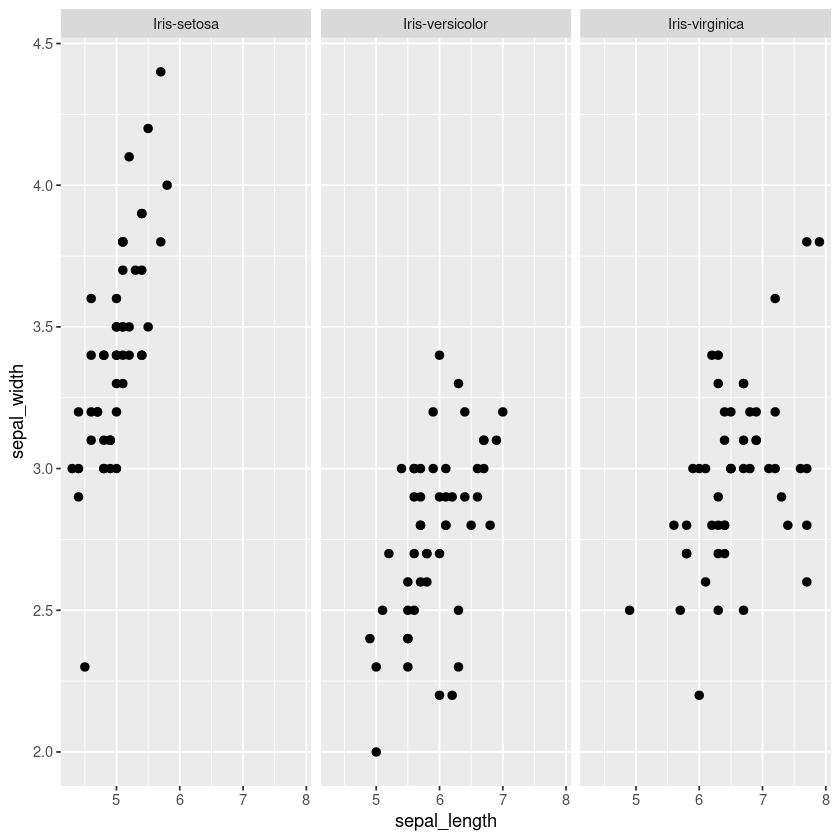

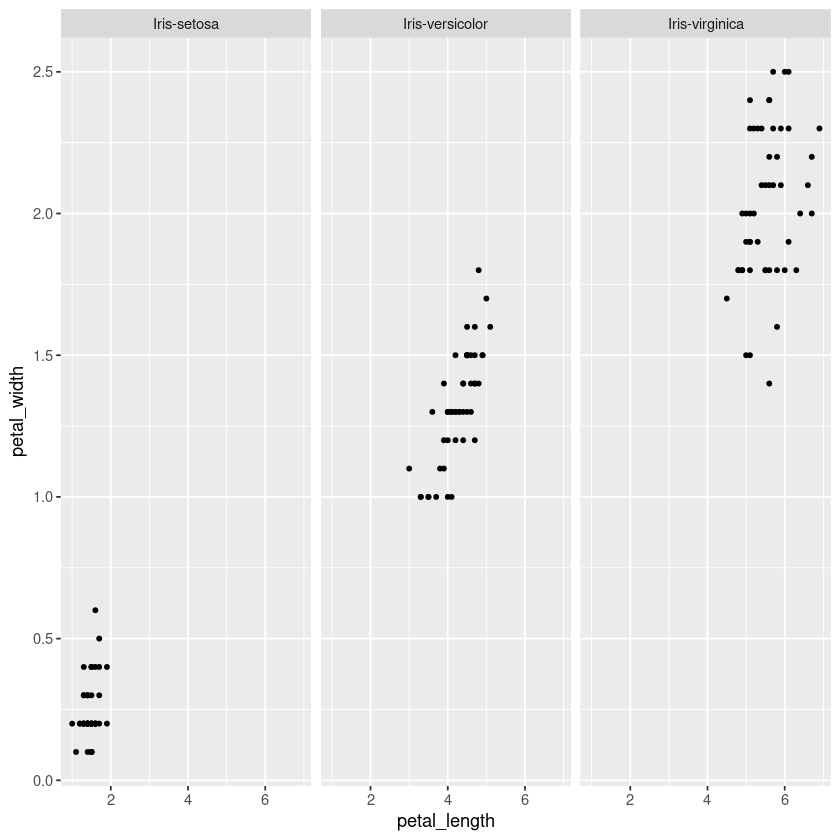

In [124]:
ggplot(iris, aes(x = sepal_length, y = sepal_width))+
    geom_point(size = 2)+
    facet_wrap(~ class) # разделить по классам

ggplot(iris, aes(x = petal_length, y = petal_width))+
    geom_point(size = 1)+
    facet_wrap(~ class) # разделить по классам



In [ ]:
# dependence for sepal_length + sepal_width in different classes
library(dplyr)
iris %>%
    group_by(class) %>%
    summarise(
        cor_kendall = cor(sepal_length, sepal_width, method = "kendall"),
        cor_spearman = cor(sepal_length, sepal_width, method = "spearman"),
        p_value_kendall = cor.test(sepal_length, sepal_width, method = "kendall")$p.value,
        p_value_spearman = cor.test(sepal_length, sepal_width, method = "spearman", exact = FALSE)$p.value

    )


#####################################################################
# To check that the function above is correct 
#cor.test(subset(iris, class == "Iris-setosa")$sepal_length, subset(iris, class == "Iris-setosa")$sepal_width, method = "spearman", exact = FALSE)


class,cor_kendall,cor_spearman,p_value_kendall,p_value_spearman
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Iris-setosa,0.6101996,0.7686085,5.437384e-09,7.161782e-11
Iris-versicolor,0.3977974,0.5176060,1.142294e-04,1.183863e-04
Iris-virginica,0.3070869,0.4265165,3.221813e-03,2.010675e-03


In [ ]:
# dependence for petal_length and petal_width in different classes
library(dplyr)
iris %>%
    group_by(class) %>%
    summarise(
        cor_kendall = cor(petal_length, petal_width, method = "kendall"),
        cor_spearman = cor(petal_length, petal_width, method = "spearman"),
        p_value_kendall = cor.test(petal_length, petal_width, method = "kendall")$p.value,
        p_value_spearman = cor.test(petal_length, petal_width, method = "spearman", exact = FALSE)$p.value

    )

class,cor_kendall,cor_spearman,p_value_kendall,p_value_spearman
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Iris-setosa,0.1828759,0.2272747,1.198247e-01,1.124498e-01
Iris-versicolor,0.6457342,0.7870096,1.285570e-09,1.229065e-11
Iris-virginica,0.2714149,0.3629133,9.399136e-03,9.590655e-03


### Additional part

In [125]:
# The way how to write functions
cor.test(~ sepal_length + sepal_width, iris, method = "kendall")
cor.test(~ petal_length + petal_width, iris, method = "spearman", exact = FALSE)




	Kendall's rank correlation tau

data:  sepal_length and sepal_width
z = -1.2469, p-value = 0.2124
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
-0.07211192 



	Spearman's rank correlation rho

data:  petal_length and petal_width
S = 35997, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9360034 


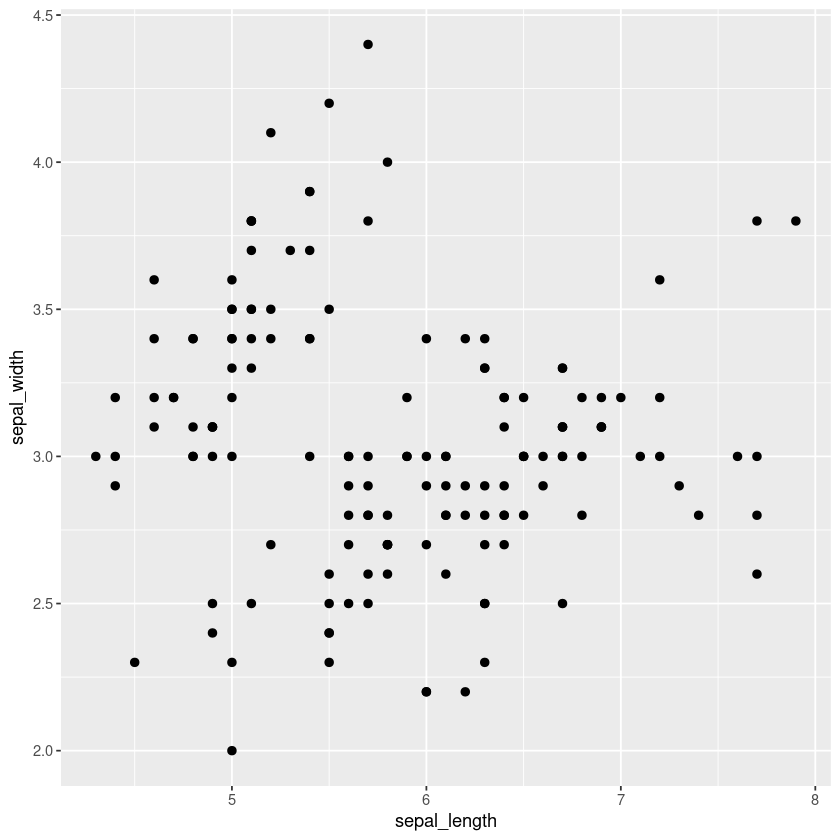

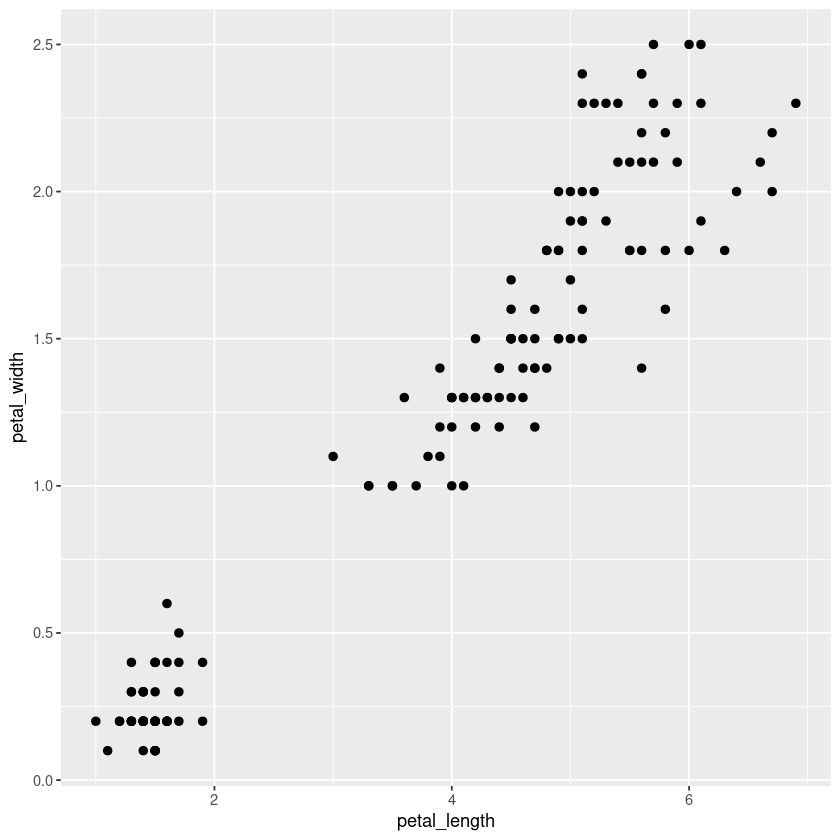

In [128]:
ggplot(iris, aes(x = sepal_length, y = sepal_width))+
    geom_point(size = 2)

ggplot(iris, aes(x = petal_length, y = petal_width))+
    geom_point(size = 2)





## 3 For dataset “cigarettes.txt”: 
---------------------------------------
VARIABLE DESCRIPTION:
Data from 1993 or earlier
x1=tar (mg)
x2=nicotine (mg)
x3=weight (g)
y=carbon monoxide (mg)

-----------------------------------------
- Test the hypotheses that the correlation between “nicotine” and “weight” is significant. Use Kendall and Spearman correlation coefficients. 
- Test the hypotheses that the correlation between “nicotine” and “carbon monoxide” is significant. Use Kendall and Spearman correlation coefficients. 

-----------------------------------------
__Conclusion:__
- __the correlation between “nicotine” and “weight”__
  - p > 0.05 => can't reject Null hypothesis that dependence NOT exist
- __the correlation between “nicotine” and “carbon monoxide”__
  - p < 0.05 => reject Null hypothesis that dependence NOT exist 

In [73]:
file_path <- "../data/cigarettes.dat.txt"
cigarettes = read.table(file_path,  sep = "", header = TRUE, fill = TRUE ,
    dec = '.',na.strings = 'NA')

# fill = True -- na в пустые колонки
cigarettes <- na.omit(cigarettes)




head(cigarettes, 3)
tail(cigarettes, 2)

,name,tar,nicotine,weight,carbon_monoxide
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Alpine,14.1,0.86,0.9853,13.6
2,Benson&Hedges,16.0,1.06,1.0938,16.6
3,BullDurham,29.8,2.03,1.1650,23.5


,name,tar,nicotine,weight,carbon_monoxide
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
24,VirginiaSlims,15.2,1.02,0.9496,13.9
25,WinstonLights,12.0,0.82,1.1184,14.9


### Plots (pairs)

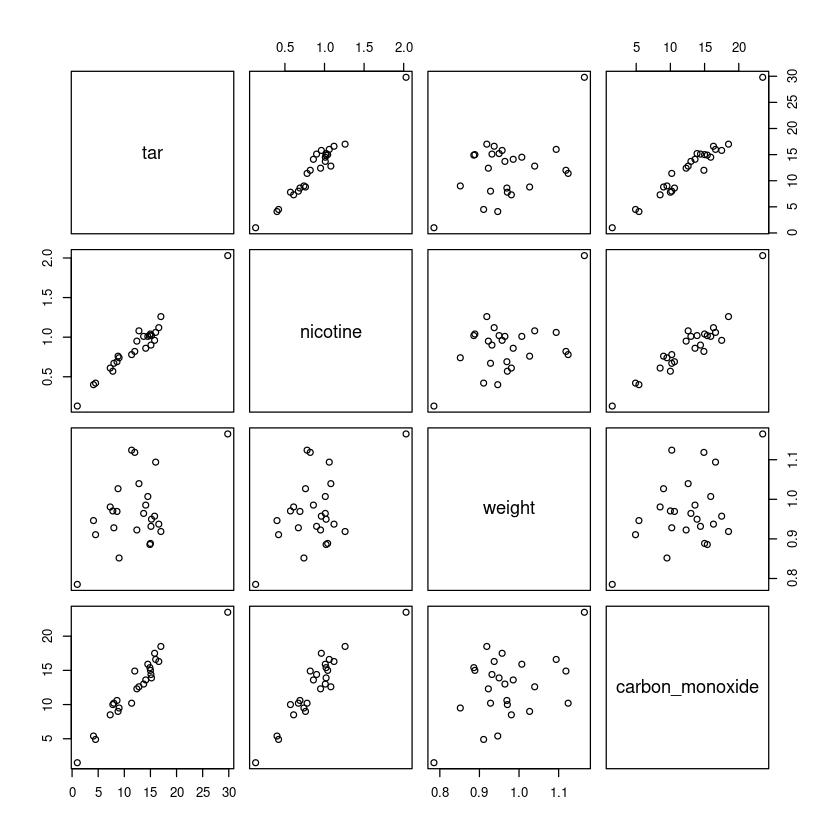

In [66]:
cigarettes_numeric = cigarettes[, c(2:5)]
pairs(cigarettes_numeric)

### Test for correlation

In [74]:
library(psych)
corr.test(cigarettes_numeric, method = "kendall", ) -> fit
#str(fit)
fit$p
fit$r

corr.test(cigarettes_numeric, method = "spearman") -> fit
#str(fit)
fit$p
#fit$r

corr.test(cigarettes_numeric, method = "pearson") -> fit
#str(fit)
fit$p
#fit$r

,tar,nicotine,weight,carbon_monoxide
tar,0.000000e+00,1.166283e-06,1.0000000,2.949221e-06
nicotine,1.943805e-07,0.000000e+00,1.0000000,2.483771e-04
weight,5.896119e-01,5.237792e-01,0.0000000,1.000000e+00
carbon_monoxide,5.898441e-07,6.209427e-05,0.4935506,0.000000e+00


,tar,nicotine,weight,carbon_monoxide
tar,1.0000000,0.8361251,0.1133333,0.8180312
nicotine,0.8361251,1.0000000,0.1337800,0.7135688
weight,0.1133333,0.1337800,1.0000000,0.1435728
carbon_monoxide,0.8180312,0.7135688,0.1435728,1.0000000


,tar,nicotine,weight,carbon_monoxide
tar,0.000000e+00,1.131908e-10,0.8925691,7.442513e-12
nicotine,2.263816e-11,0.000000e+00,0.8925691,3.293984e-08
weight,4.582872e-01,3.471664e-01,0.0000000,8.925691e-01
carbon_monoxide,1.240419e-12,8.234960e-09,0.2975230,0.000000e+00


,tar,nicotine,weight,carbon_monoxide
tar,0.000000e+00,4.481132e-16,0.03266643,3.276122e-13
nicotine,7.468553e-17,0.000000e+00,0.03266643,1.324690e-10
weight,1.274105e-02,1.088881e-02,0.00000000,3.266643e-02
carbon_monoxide,6.552245e-14,3.311725e-11,0.01948117,0.000000e+00


In [87]:
# Just for example how to use for 2 particular variables
cor.test(cigarettes$nicotine, cigarettes$carbon_monoxide, method="kendall")





Warning message in cor.test.default(cigarettes$nicotine, cigarettes$carbon_monoxide, :
“Cannot compute exact p-value with ties”



	Kendall's rank correlation tau

data:  cigarettes$nicotine and cigarettes$carbon_monoxide
z = 4.9787, p-value = 6.402e-07
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.7135688 


## 4 Suppose in a coin tossing, the chance to get a head or tail is 50 %. In a real case, we have 100 coin tossings, and get 48 heads, is our original hypothesis true? [Use binom.test] 

<u>_probability to get a head in general case:_</u>

__H0__: $p = p_0 = 0,5$ probability to get a head in general case

__H1__: $p = p_1 (< p_0)$ 

<u>_probability to get a tail in general case:_</u>

__H0__: $p = p_0 = 0,5$ probability to get a tail in general case

__H1__: $p = p_1 (> p_0)$ 
__Conclusion:__
- Cant reject Null hypothesis.



In [ ]:
binom.test(
    x = 48,
    n = 100,
    p = 0.5,
    alternative = "less"
)
binom.test(
    x = 52,
    n = 100,
    p = 0.5,
    alternative = "greater"
)


	Exact binomial test

data:  48 and 100
number of successes = 48, number of trials = 100, p-value = 0.3822
alternative hypothesis: true probability of success is less than 0.5
95 percent confidence interval:
 0.0000000 0.5667681
sample estimates:
probability of success 
                  0.48 



	Exact binomial test

data:  52 and 100
number of successes = 52, number of trials = 100, p-value = 0.3822
alternative hypothesis: true probability of success is greater than 0.5
95 percent confidence interval:
 0.4332319 1.0000000
sample estimates:
probability of success 
                  0.52 


## 5 Did a fair (честный) coin produce 8 heads in 10 flips? By “fair” we mean the coin with equal probabilities of appearance of both sides. [Use binom.test] 

H0: $p = p_0 = 0,5$ 

H1: $p = p_1 (< p_0)$

__Conclusion:__
- Null hypothesis is not rejected. 

In [ ]:
binom.test(
    x = 8,
    n = 10,
    p = 0.5,
    alternative = "less"
)


	Exact binomial test

data:  8 and 10
number of successes = 8, number of trials = 10, p-value = 0.9893
alternative hypothesis: true probability of success is less than 0.5
95 percent confidence interval:
 0.0000000 0.9632286
sample estimates:
probability of success 
                   0.8 
